# Jupyter Notebook for Task 2: Descriptive Analysis

#### Preparation

In [57]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from matplotlib.ticker import PercentFormatter


# import Dataframes with cleaned data independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data_cleaned = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data_cleaned = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))
#TODO: wenn wir das nicht mehr brauchen, rausschmeißen
merged_charging_weather_data = pd.read_pickle(os.path.join('Data', 'merged_charging_weather_data.pkl'))

charging_data_cleaned.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,connection_date,year_month,charging_duration,connection_duration
30793,0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 04:08:04-07:00,2018-04-25 06:20:10-07:00,2018-04-25 06:20:10-07:00,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,,2018-04-25,2018-04,133.100000,132.100000
30794,1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 06:45:10-07:00,2018-04-25 17:56:16-07:00,2018-04-25 09:44:15-07:00,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,,2018-04-25,2018-04,179.083333,671.100000
30795,2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 06:45:50-07:00,2018-04-25 16:04:45-07:00,2018-04-25 07:51:44-07:00,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,,2018-04-25,2018-04,65.900000,558.916667
30796,3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 07:37:06-07:00,2018-04-25 16:55:34-07:00,2018-04-25 09:05:22-07:00,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,,2018-04-25,2018-04,88.266667,558.466667
30797,4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 07:40:34-07:00,2018-04-25 16:03:12-07:00,2018-04-25 10:40:30-07:00,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,,2018-04-25,2018-04,179.933333,502.633333


## 1 Temporal Patterns

The goal of the first task is to analyze patterns in the variation of the charging sessions between day, week and season.
Lets break down the task:

1.  **Feature Engineering for Time:** We created relevant time-based features to capture the nuances of charging behavior. This includes:

    *   Hour of Start and End: Extracted from the connection and disconnect timestamps (`hourstart` & `hourend`).
    *   Day of Week: Categorizes charging events by weekdays (`day_of_week`).
    *   Month: Identifies the month of the charging event (`month`).
    *   Season: Groups months into seasonal categories (`season`).

2.  **Ordering:** After creating these features, we'll ensure the data is correctly ordered chronologically for visual purposes

3.  **Visualizing with Bar Plots:** We created three bar plots to visualize these patterns:
    *   Hourly Charging Events: Shows the number of charging events initiated (connection) and completed (disconnection) throughout the day.
    *   Daily Charging Events: Illustrates how charging frequency varies across weekdays.
    *   Seasonal Charging Events: Reveals potential seasonal trends in charging activity.


In [81]:
# Extract time-based features
charging_data_cleaned['hourstart'] = charging_data_cleaned['connectionTime'].dt.hour
charging_data_cleaned['hourend'] = charging_data_cleaned['disconnectTime'].dt.hour

charging_data_cleaned['day_of_week'] = charging_data_cleaned['connectionTime'].dt.day_name()
charging_data_cleaned['month'] = charging_data_cleaned['connectionTime'].dt.month
charging_data_cleaned['season'] = charging_data_cleaned['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else 
              'Spring' if x in [3, 4, 5] else 
              'Summer' if x in [6, 7, 8] else 
              'Autumn'
)

# Aggregation for patterns
hourly_pattern_start = charging_data_cleaned.groupby('hourstart').size()
hourly_pattern_end = charging_data_cleaned.groupby('hourend').size()

daily_pattern = charging_data_cleaned.groupby('day_of_week').size()
seasonal_pattern = charging_data_cleaned.groupby('season').size()

# Sort days for correct visualization order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['Spring', 'Summer', 'Autumn', 'Winter']

daily_pattern = daily_pattern.reindex(day_order)
seasonal_pattern = seasonal_pattern.reindex(month_order)

df = pd.DataFrame({
    'Hour': hourly_pattern_start.index,
    'Connection time': hourly_pattern_start.values,
    'Disconnection Time': hourly_pattern_end.values
}).melt(id_vars='Hour', var_name='Series', value_name='Events')

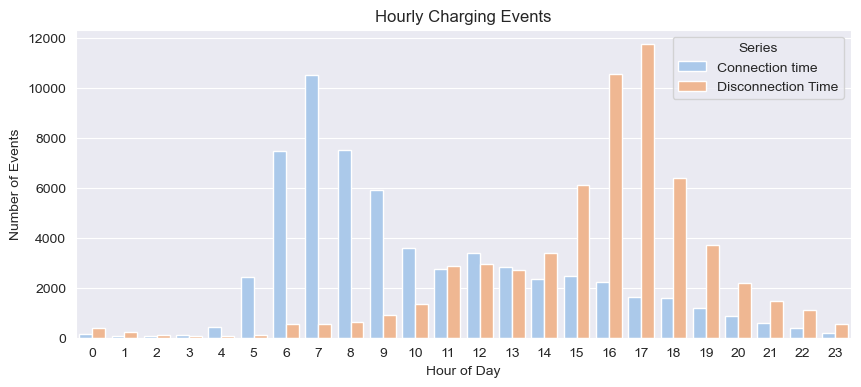

In [82]:
# First Plot: Hourly Charging Events
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x='Hour', y='Events', hue='Series', palette='pastel')
plt.title('Hourly Charging Events')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='Series', loc='upper right')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

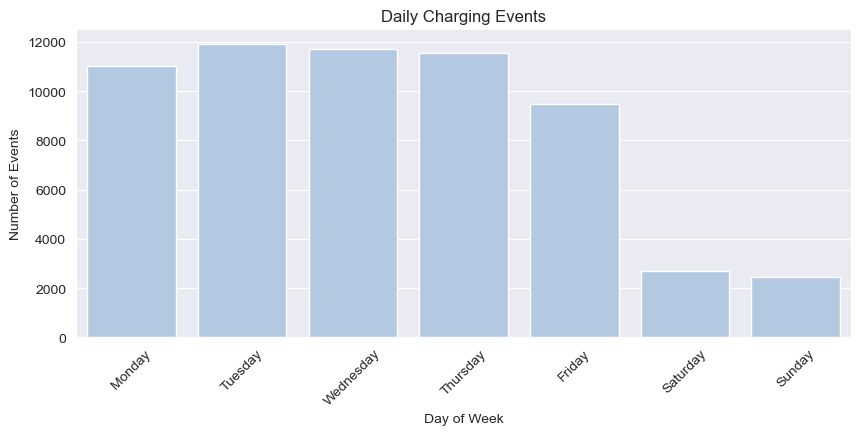

In [83]:
# Second Plot: Daily Charging Events
plt.figure(figsize=(10, 4))
sns.barplot(x=daily_pattern.index, y=daily_pattern.values, color='#abc9ea')
plt.title('Daily Charging Events')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)

Text(0, 0.5, 'Number of Events')

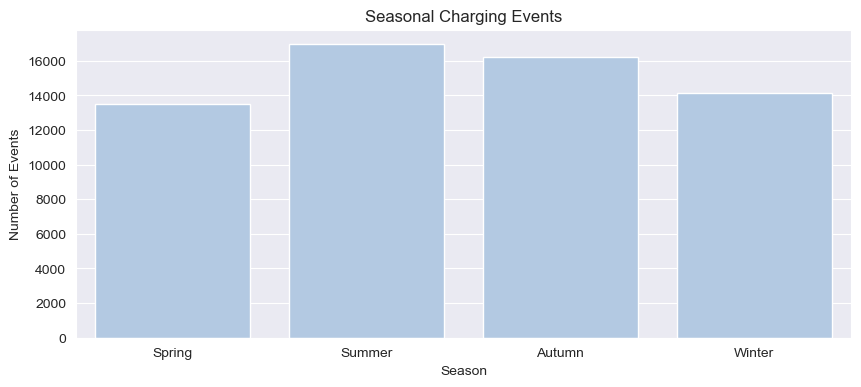

In [84]:
# Third Plot: Seasonal Charging Events
plt.figure(figsize=(10, 4))
sns.barplot(x=seasonal_pattern.index, y=seasonal_pattern.values, color='#abc9ea')
plt.title('Seasonal Charging Events')
plt.xlabel('Season')
plt.ylabel('Number of Events')

## Weather-dependant analysis

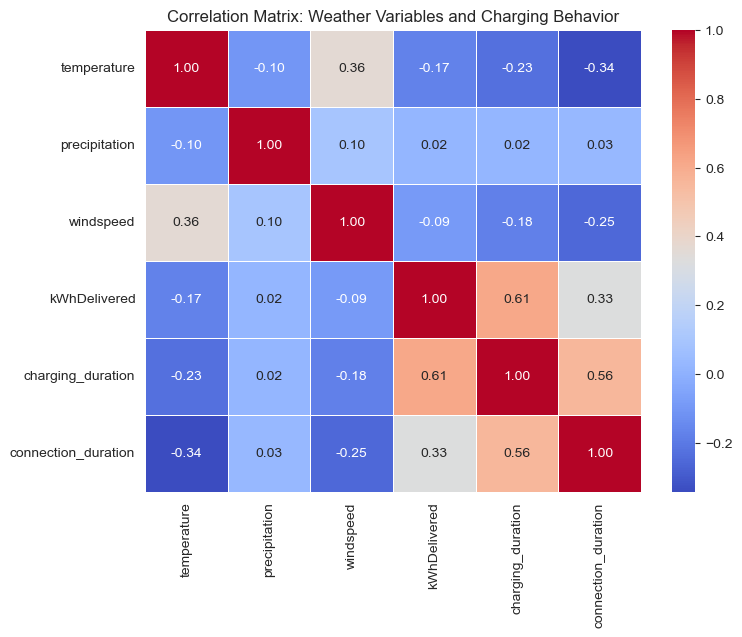

In [62]:
# Select relevant columns for correlation
correlation_data = merged_charging_weather_data[['temperature', 'precipitation', 'windspeed', 'kWhDelivered', 'charging_duration', 'connection_duration']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Weather Variables and Charging Behavior')
plt.show()

# Extract specific correlations
temp_energy_corr = correlation_matrix.loc['temperature', 'kWhDelivered']
precip_duration_corr = correlation_matrix.loc['precipitation', 'charging_duration']
wind_connection_corr = correlation_matrix.loc['windspeed', 'connection_duration']

**Observations from the Correlation Matrix:** </br>
- Minimal impact of weather variables: temperature, precipitation and wind speed have minimal influence on energy delivered, charging duration and connection duration
- windspeed and temperature have a slight positive correlation, which makes sense to us, but does not affect our charging data
- The most significant relationships are within the charging behavior metric themselves: charging duration and kWhDelivered increase as the connection duration increases, as expected

***

## 2 Key Performance Indicators

Goal is to define 3 KPIs for a dashboard and visualize them over time

1. Define KPIs, e.g.:

    - Utilization Rate: Percentage of total available charging station in use.
    -> Highlights how effectively the charging stations are being utilized.

    - Idle Time Percentage: Proportion of stations that are occupied but not actively charging.
    -> Identifies inefficiencies and opportunities to improve turnover.

    - kWh delivered: Total sum of kWh delivered in the respective hour.
    -> Highlights the energy use between hours, helping in capacity planning and pricing strategies.

    Other (not chosen) Alternatives:
    - Peak Hour Utilization: Number of charging sessions started during the busiest hour.
    -> Shows when demand is highest, helping in capacity planning and pricing strategies.

    - Average Charging Speed (kWh/hour): Average rate of energy delivery during charging sessions.
    -> Helps monitor equipment performance and customer experience.

    - Session Duration: Average time per charging session.
    -> Provides insights into user behavior and informs station scheduling.

    - Revenue per kWh (if pricing data available): Average revenue generated per unit of energy delivered. -> No pricing data avalible
    -> Directly ties operational efficiency to financial performance.

    - Sessions per Charger: Average number of charging sessions per station over time. -> not good
    -> Measures the distribution of usage across stations and identifies underperforming assets.

    - Peak-to-Average Load Ratio: Ratio of peak energy demand to average demand.
    -> Helps identify stress periods on the grid and the need for scaling infrastructure.

    - Repeat Customer Ratio: Percentage of unique users returning for multiple sessions.
    -> Indicates customer loyalty and satisfaction with the charging hub.

    - Weather Impact Correlation: Relationship between weather (e.g., temperature, rain) and charging demand.
    -> Provides context for fluctuations in usage, enabling better forecasting

2. Combine KPIs into a Dataframe
3. Plot the KPIs over time


In [63]:
def aggregate_charging_data(df, start_date, end_date):
    # Create a list of all hours in the date range
    all_hours = pd.date_range(start=start_date, end=end_date, freq='h')
    # Create an empty DataFrame for the aggregated data
    aggregated_df = pd.DataFrame(index=all_hours)
    aggregated_df.index.name = 'start_hour'

    total_hourly_chargingDuration = [0] * len(all_hours)
    total_hourly_connectionDuration = [0] * len(all_hours)
    total_numberOfSpaces = 0
    # Loop through the sites
    for site_id in df['siteID'].unique():
        site_df = df[df['siteID'] == site_id].copy()
        numberOfSpaces = len(site_df['spaceID'].unique())
        total_numberOfSpaces += numberOfSpaces

        hourly_activeSessions = []
        hourly_utilizationRate = []
        hourly_kwhDelivered = []
        hourly_idleRate = []
        hourly_blockedRate = []
        for index, hour in enumerate(all_hours):
            start_of_hour = hour
            end_of_hour = hour + pd.Timedelta(hours=1)
            # All charging sessions that were active during the hour
            # including these edge cases:
            #       If a session ended exactly at the beginning of the hour or
            #       If a session started exactly at the end of the hour
            active_chargers = site_df[(site_df['connectionTime'] <= end_of_hour) & (site_df['disconnectTime'] >= start_of_hour)]
            hourly_activeSessions.append(len(active_chargers))

            total_kwh_in_hour = 0
            total_chargingDuration_in_hour = 0
            total_connectionDuration_in_hour = 0
            for _, charger in active_chargers.iterrows():
                # We want to calculate various metrics proportionally, like kWhDelivered:
                #   Therefore, we take either connectionTime/doneChargingTime or start_hour - whichever is greater
                #   the same for disconnectTime/doneChargingTime but vice versa
                connectionTime = max(charger['connectionTime'], start_of_hour)
                disconnectTime = min(charger['disconnectTime'], end_of_hour)
                doneChargingTime = min(charger['doneChargingTime'], end_of_hour)
                # How long was actually charged/connected in the hour?
                chargingDuration_in_hour = (doneChargingTime - connectionTime).total_seconds() / 3600 #Dauer in Stunden
                connectionDuration_in_hour = (disconnectTime - connectionTime).total_seconds() / 3600 #Dauer in Stunden
                total_connectionDuration_in_hour += connectionDuration_in_hour

                # Edge Cases: charging sessions started exactly at the end of the hour
                #               or ended at the beginning of the hour
                #               or charging sessions are in idle time
                if chargingDuration_in_hour > 0:
                    kwh_in_hour = (charger['kWhDelivered'] /
                                   ((charger['doneChargingTime'] - charger['connectionTime']).total_seconds() / 3600)) * chargingDuration_in_hour
                    total_kwh_in_hour += kwh_in_hour
                    total_chargingDuration_in_hour += chargingDuration_in_hour

            # calculation of metrics
            hourly_kwhDelivered.append(total_kwh_in_hour)
            # hourly_utilizationRate.append(total_chargingDuration_in_hour / numberOfSpaces)
            hourly_utilizationRate.append(total_connectionDuration_in_hour / numberOfSpaces)
            total_hourly_chargingDuration[index] += total_chargingDuration_in_hour
            total_hourly_connectionDuration[index] += total_connectionDuration_in_hour
            if total_connectionDuration_in_hour > 0:
                hourly_idleRate.append(total_chargingDuration_in_hour / total_connectionDuration_in_hour)
                hourly_blockedRate.append((total_connectionDuration_in_hour - total_chargingDuration_in_hour) / numberOfSpaces)
            else:
                hourly_idleRate.append(0)
                hourly_blockedRate.append(0)


        aggregated_df[f'activeSessions_site{site_id}'] = hourly_activeSessions
        aggregated_df[f'utilizationRate_site{site_id}'] = hourly_utilizationRate
        aggregated_df[f'kWhDelivered_site{site_id}'] = hourly_kwhDelivered
        aggregated_df[f'idleRate_site{site_id}'] = hourly_idleRate
        aggregated_df[f'blockedRate_site{site_id}'] = hourly_blockedRate

    aggregated_df.fillna(0, inplace=True)
    aggregated_df['activeSessions_total'] = aggregated_df['activeSessions_site1'] + aggregated_df['activeSessions_site2']
    aggregated_df['kWhDelivered_total'] = aggregated_df['kWhDelivered_site1'] + aggregated_df['kWhDelivered_site2']
    # aggregated_df['utilizationRate_total'] = np.array(total_hourly_chargingDuration) / total_numberOfSpaces
    aggregated_df['utilizationRate_total'] = np.array(total_hourly_connectionDuration) / total_numberOfSpaces
    aggregated_df['idleRate_total'] = np.divide(
        total_hourly_chargingDuration,
        total_hourly_connectionDuration,
        out=np.zeros_like(total_hourly_chargingDuration, dtype=float), # wichtig für korrekten Datentyp
        where=np.array(total_hourly_connectionDuration) != 0
    )
    # aggregated_df['blockedRate_total'] = (np.array(total_hourly_connectionDuration) - np.array(total_hourly_chargingDuration)) / total_numberOfSpaces
    aggregated_df['blockedRate_total'] = np.array(total_hourly_chargingDuration) / total_numberOfSpaces
    return aggregated_df


# the weather data is always delivered at 7:53h, 8:53h etc. -> so we round up to the next hour
def round_timestamp(timestamp):
    try:
        # Try to round the timestamp
        return timestamp.round('h')
    except:
        # ... this does not always work due to daylight saving time changes
        #     -> in this case we just leave the timestamp as it is
        return timestamp


def merge_with_weather_data(agg_data, weather):
    weather_data = weather.copy()
    aggregated_data = agg_data.copy()
    weather_data['timestamp'] = weather_data['timestamp'].apply(round_timestamp)
    # Reduce to hourly data (if multiple records per hour are delivered somewhere)
    weather_data = weather_data.set_index('timestamp').resample('h').last().reset_index()
    weather_data = weather_data.rename(columns={'timestamp': 'start_hour'})

    aggregated_data = pd.merge(aggregated_data, weather_data, on='start_hour', how='left')
    aggregated_data.drop(columns=['city', 'felt_temperature', 'weather_date'], inplace=True)
    return aggregated_data

The idea of the following code snippet is that the settings (`start_time` and `end_time`) can be adjusted to the desired time frame
- for our exemplary visualization we set the timeframe randomly in the dataset
- for a Dashboard this could be programmed to show the last x days with data

,activeSessions_site2,utilizationRate_site2,kWhDelivered_site2,idleRate_site2,blockedRate_site2,activeSessions_site1,utilizationRate_site1,kWhDelivered_site1,idleRate_site1,blockedRate_site1,activeSessions_total,kWhDelivered_total,utilizationRate_total,idleRate_total,blockedRate_total
start_hour,,,,,,,,,,,,,,,
2021-09-07 00:00:00-07:00,0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
2021-09-07 01:00:00-07:00,0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
2021-09-07 02:00:00-07:00,0,0.0,0.0,0.0,0.0,1,0.011341,3.549258,1.000000,0.000000,1,3.549258,0.005563,1.000000,0.005563
2021-09-07 03:00:00-07:00,0,0.0,0.0,0.0,0.0,1,0.019231,6.018525,1.000000,0.000000,1,6.018525,0.009434,1.000000,0.009434
2021-09-07 04:00:00-07:00,0,0.0,0.0,0.0,0.0,2,0.030134,2.438079,0.541571,0.013814,2,2.438079,0.014782,0.541571,0.008006


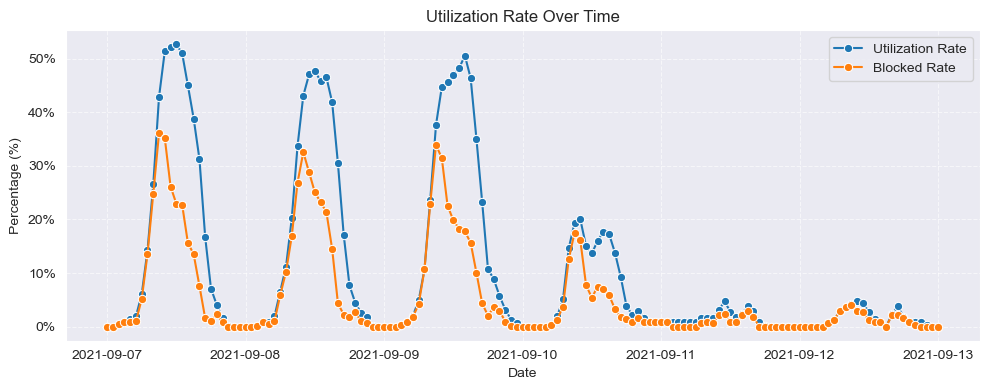

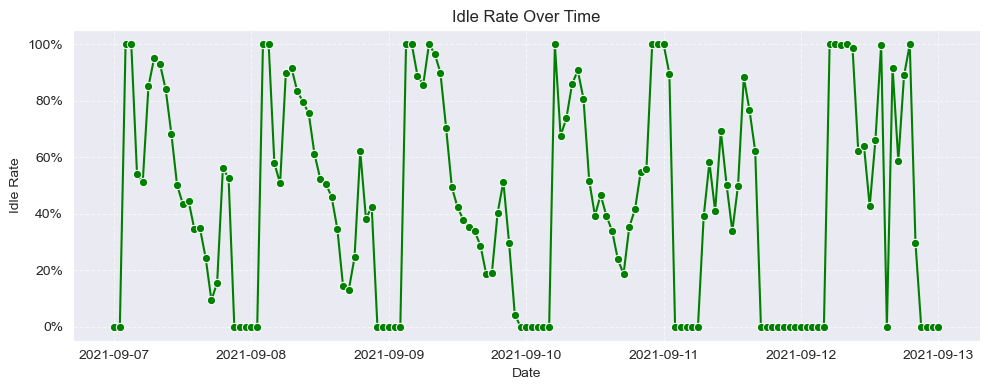

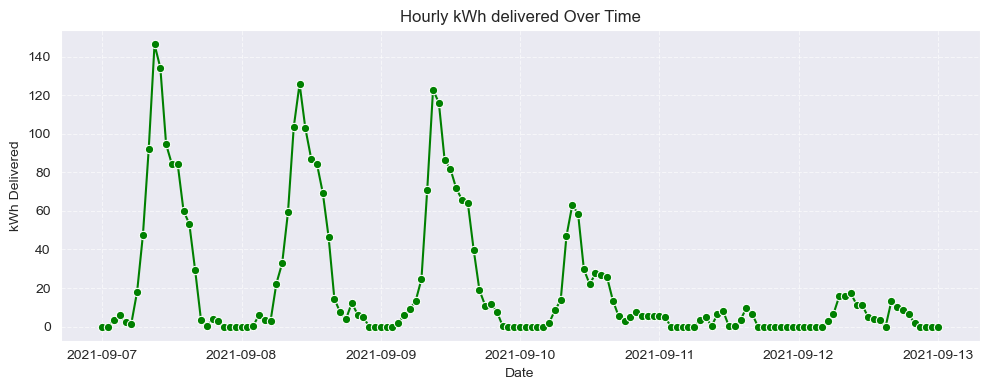

In [87]:
# Settings:
start_time = '2021-09-07'
end_time = '2021-09-13'

result = aggregate_charging_data(charging_data_cleaned, pd.to_datetime(start_time).tz_localize('America/Los_Angeles'),
                                 pd.to_datetime(end_time).tz_localize('America/Los_Angeles'))


display(result.head())

# Display the result
plt.figure(figsize=(10, 4))
sns.lineplot(data=result, x='start_hour', y='utilizationRate_total', marker='o', color='tab:blue', label='Utilization Rate')
sns.lineplot(data=result, x='start_hour', y='blockedRate_total', marker='o', color='tab:orange', label='Blocked Rate')
plt.title('Utilization Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
sns.lineplot(data=result, x='start_hour', y='idleRate_total', marker='o', color='green')
plt.title('Idle Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Idle Rate')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.lineplot(data=result, x='start_hour', y='kWhDelivered_total', marker='o', color='green')
plt.title('Hourly kWh delivered Over Time')
plt.xlabel('Date')
plt.ylabel('kWh Delivered')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Observations:**
- Clear daily cyclic patterns, with lows at night and highs at about midday to afternoon
- During peak hours, blocked rates rise, indicating that a significant number of chargers are occupied but not in active use

***

## 3 Site Characteristics

#### Public vs. private charging hubs
In order to find out which of the two sites is the public one, we first have to clarefy caracteristics of private and public charging hubs and what we think how they differ:
1. Public Charging Hubs:
    - __User patterns__: Public Hubs likely serve a more broad and transistant user base with a higher number of unique users. The sessions per user might be lower, because users use the charging stations occasionally (e.g. at trips).
    - __Energy consumtion__: The total Energy delivered ist most likely higher due to the larger number of users, while the energy delivered per session is likely smaller becuse User only charge whats necessary.
    - __Infrastructure__: The number of stations is higher to accomodate more users. That for the sessions per station could be lower due to more destribution.
    - __Session timing__: The usage might align with travel times (e.g. middays or weekends). Because Users typicly only "top up" their cars instead of charging it full the average charging time is most likely shorter.
2. Private Charging Hubs:
    - __User patterns__: Pivate Hubs likely serve a specific user group, such as employees. There are likely less individual users but higher sessions per user due to frequent use by the same people
    - __Energy consumtion__: The total Energy delivered ist most likely lower, while the energy delivered per session is likely higher due to fewer but longer sessions.
    - __Infrastructure__: Fewer stations but higher sessions per station, as usage is split among a smaller group.
    - __Session timing__: The usage might align with regular schedules (e.g. working). The average charging durations are kikely longer, as users might leave their vehicles for extended periods, like during work.

#### Data analysis strategy
To find out which of the sites is public we will look at specific Metrics per site, explore seasonal patterns and look at differences in operation.

##### 1. Metrics

In [93]:
site_data = charging_data_cleaned.groupby('siteID').agg({
    'kWhDelivered': ['mean', 'sum', 'count'],
    'userID': 'nunique',
    'stationID': 'nunique',
    'charging_duration': 'mean'
})

# Rename columns
site_data.columns = ['Avg_kWh_Delivered', 'Total_kWh_Delivered', 'Total_Sessions', 'Unique_Users', 'Unique_Stations', 'Avg_Charging_Duration']

# Calculate Metrics
valid_sessions = charging_data_cleaned[charging_data_cleaned['userID'].notnull()]
valid_session_counts = valid_sessions.groupby('siteID').size()

site_data['Sessions_per_User'] = valid_session_counts / site_data['Unique_Users']
site_data['Sessions_per_Station'] = site_data['Total_Sessions'] / site_data['Unique_Stations']

site_data

,Avg_kWh_Delivered,Total_kWh_Delivered,Total_Sessions,Unique_Users,Unique_Stations,Avg_Charging_Duration,Sessions_per_User,Sessions_per_Station
siteID,,,,,,,,
1,14.15798,447080.676752,31578,512,52,241.348469,61.675781,607.269231
2,8.80483,257567.695753,29253,460,54,175.569171,63.593478,541.722222


##### Observations:
We can observe the following from the site Data:
- Unique Users: Higher unique users suggest site 2 being a public hub.
- Sessions per User: Lower sessions per user suggest a public hub, while higher values point to a private hub, pointing to the same conclusion as the unique users.
- Charging Duration: Shorter durations suggest site 2 being a public hub, as users don’t stay long.
- Energy Delivered: Higher average energy per session suggests site 1 being a private hub.
The metrics suggest that site 1 is the private one and site to being the orivate one. To make sure, we look at Time-Based patterns.

##### 2. Time-Based Patterns

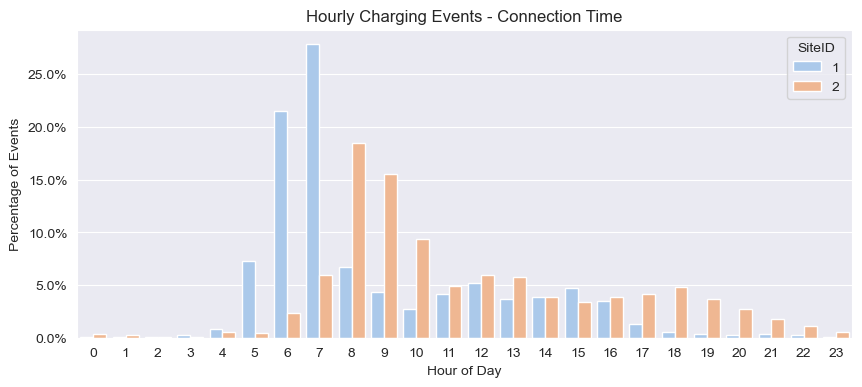

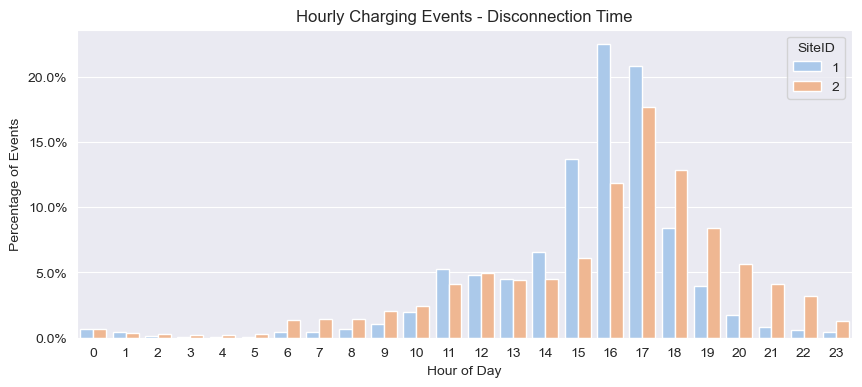

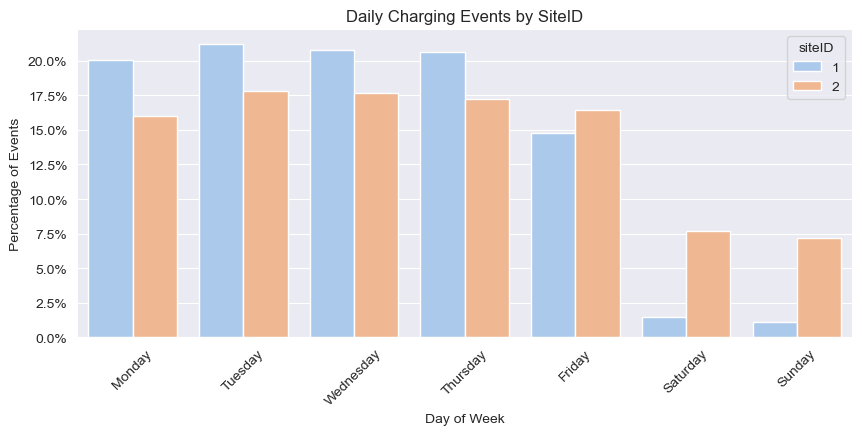

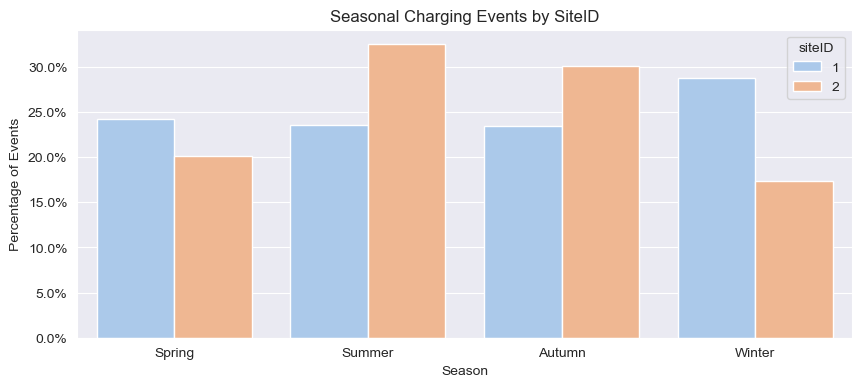

In [92]:
## calculation of total events per site (siteID)
total_events_site = charging_data_cleaned.groupby('siteID').size().reset_index(name='TotalEvents')

# calculate relative values for hourly_pattern_site
hourly_pattern_site = charging_data_cleaned.groupby(['hourstart', 'siteID']).size().reset_index(name='Events')
hourly_pattern_site = hourly_pattern_site.merge(total_events_site, on='siteID')
hourly_pattern_site['RelativeEvents'] = hourly_pattern_site['Events'] / hourly_pattern_site['TotalEvents']

# calculate relative values for hourly_pattern_end_site
hourly_pattern_end_site = charging_data_cleaned.groupby(['hourend', 'siteID']).size().reset_index(name='Events')
hourly_pattern_end_site = hourly_pattern_end_site.merge(total_events_site, on='siteID')
hourly_pattern_end_site['RelativeEvents'] = hourly_pattern_end_site['Events'] / hourly_pattern_end_site['TotalEvents']

# calculate relative values for daily_pattern_site
daily_pattern_site = charging_data_cleaned.groupby(['day_of_week', 'siteID']).size().reset_index(name='Events')
daily_pattern_site = daily_pattern_site.merge(total_events_site, on='siteID')
daily_pattern_site['RelativeEvents'] = daily_pattern_site['Events'] / daily_pattern_site['TotalEvents']

# calculate relative values for seasonal_pattern_site
seasonal_pattern_site = charging_data_cleaned.groupby(['season', 'siteID']).size().reset_index(name='Events')
seasonal_pattern_site = seasonal_pattern_site.merge(total_events_site, on='siteID')
seasonal_pattern_site['RelativeEvents'] = seasonal_pattern_site['Events'] / seasonal_pattern_site['TotalEvents']

# First Plot: Hourly connection and disconnection events for each siteID
plt.figure(figsize=(10, 4))
sns.barplot(data=hourly_pattern_site, x='hourstart', y='RelativeEvents', hue='siteID', palette='pastel')
plt.title('Hourly Charging Events - Connection Time')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Events')
plt.legend(title='SiteID', loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Second Plot: Hourly disconnection events for each siteID
plt.figure(figsize=(10, 4))
sns.barplot(data=hourly_pattern_end_site, x='hourend', y='RelativeEvents', hue='siteID', palette='pastel')
plt.title('Hourly Charging Events - Disconnection Time')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Events')
plt.legend(title='SiteID', loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Second Plot: Daily Charging Events for each siteID
plt.figure(figsize=(10, 4))
sns.barplot(data=daily_pattern_site, x='day_of_week', y='RelativeEvents', hue='siteID', palette='pastel', order=day_order)
plt.title('Daily Charging Events by SiteID')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Events')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Third Plot: Seasonal Charging Events for each siteID
plt.figure(figsize=(10, 4))
sns.barplot(data=seasonal_pattern_site, x='season', y='RelativeEvents', hue='siteID', palette='pastel', order=month_order)
plt.title('Seasonal Charging Events by SiteID')
plt.xlabel('Season')
plt.ylabel('Percentage of Events')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#plt.tight_layout()
#plt.show()

**Observations:** </br>
The analysis of time pattern support the previous observations that site one is the private and site two the public one.
1. Site 1: The hourly and daily Charging events show a work related pattern. Connection and disconnection times show are in highest between 7am and 4pm and the site is much more used on weekdays. The seasonal distribution shows no significant pattern.
2. Site 2: The patterns seem to be more travel related. Connection/disconnection time is later on average and there are more connections on weekends. The site is mostly used in Summer.

**Conclusion:** </br>
After we looked at the characteristics and operations of public and private charging hubs, developing a data analytics strategy based on the findings and executing it, we found, that site 1 ist likely the private and site 2 the public charging hub.

## 4 Export of Aggregated Data

The final step involves calculating and exporting the aggregated data visualized above. Covering the complete timeframe of our charging (and weather) data, this exported dataset will serve as the foundation for the modeling work in Task 4.

In [67]:
to_be_exported = aggregate_charging_data(charging_data_cleaned,
                                         charging_data_cleaned['connectionTime'].min().floor('h'),
                                         charging_data_cleaned['disconnectTime'].max().ceil('h'))
to_be_exported = merge_with_weather_data(to_be_exported, weather_data_cleaned)
# Adding of time-related columns
to_be_exported = to_be_exported.set_index('start_hour')
to_be_exported['hour_of_day'] = to_be_exported.index.hour
to_be_exported['week_of_year'] = to_be_exported.index.isocalendar().week
to_be_exported['day_of_week'] = to_be_exported.index.dayofweek  # 0=Monday, 6=Sunday
to_be_exported['month_of_year'] = to_be_exported.index.month
to_be_exported['is_weekend'] = to_be_exported.index.dayofweek >= 5# Saturday (5) or Sunday (6)
to_be_exported['date'] = to_be_exported.index.date

to_be_exported.to_pickle(os.path.join('Data', 'aggregated_data.pkl'))
